# Résolution d'équations différentielles avec <code>scipy</code>

Ce fichier montre la résolution d'équations différentielles en utilisant la bibliothèque <code>scipy</code> qui est orienté pour le calcul scientifique. Nous allons partir d'un exemple simple, qu'on peut résoudre « à la main » ou en utilisant la bibliothèque <code>sympy</code> qui permet de faire du calcul symbolique. Mais les cas rencontrés par l'ingénieur ne sont pas toujours aussi simple et au final, c'est bien une résolution numérique qui est recherchée. 

Nous expliquerons rapidement les principes d'une résolution numérique et montrerons son application avec <code>scipy.solve_ivp</code>. Il existe plusieurs types de solveurs et nous en parlerons brièvement.

La bibliothèque <code>matplotlib</code> sera de nouveau utilisée pour visualiser les graphes des fonctions résultantes.

## Un exemple simple

Nous commençons par un exemple simple, mais qui se rencontre souvent en physique. Il s'agit d'une mesure $y$, nulle à l'origine et dont la vitesse de changement est inversement proportionnelle à sa distance à 1 (pour être normé). 

$$\frac{dy(t)}{dt} = 1 - y(t) \quad \text{avec} \quad y(0) = 0$$

Pour résoudre, cette équation, on fait le changement de variable 
$Y(t) = y(t) - 1$ et la résolution devient plus simple.

$
\begin{array}{ll}
\frac{dY(t)}{dt}   & = -Y(t)\\
\frac{dY(t)}{Y(t)} & = -dt  \\
\ln(Y(t))          & = -t + cste  \\
Y(t)               & = Y_0\cdot e^{-t} \\
y(t)               & = 1 - e^{-t} \\
\end{array}
$

ceci en tenant compte des conditions intiales qui nous ont été données.

On peut donc directement afficher le graphe avec cette équation en utilisant <code>matplotlib.pyplot</code>.

In [2]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

On utilise la bibliothèque <code>numpy</code> pour générer une suite de 21 points entre 0 et 20, et qui seront les points représentant l'axe des temps $t$.

In [8]:
import numpy as np
t = np.linspace(0,10,20)

Text(0, 0.5, 'y(t)')

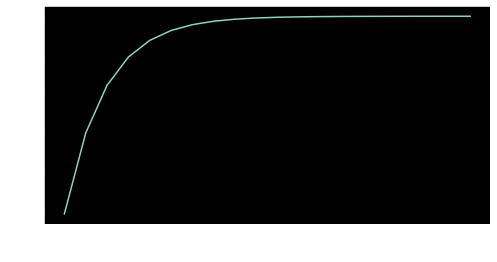

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(t, 1 - np.exp(-t))
ax.set_xlabel('time')
ax.set_ylabel('y(t)')

Cette équation est simple et classique, mais voyons comment nous aurions utilisé <code>sympy</code>.

## Résolution avec <code>sympy</code>

J'ai besoin de définir le symbole <code>t</code> et la fonction <code>y(t)</code> La résolution se fait ensuite avec le solveur <code>dsolve</code> de <code>sympy</code>.

In [15]:
import sympy as sp
t = sp.symbols('t')
y = sp.Function('y')
sol = sp.dsolve(sp.Eq(y(t).diff(t,1) + y(t), 1) , y(t)).rhs
print(sol)

C1*exp(-t) + 1


Pour avoir la valeur de la constante $C1$, nous devons simplement résoudre la condition initiale $y(0)=0$. Nous le faisons en utilisant la fonction <code>solve</code> puisqu'il ne s'agit que d'une équation classique (sans dérivée).

In [16]:
C1 = sp.solve([sol.subs(t,0), 0])
final = sol.subs(C1)
print(final)

1 - exp(-t)


Il faut comprendre que <code>sol</code> et ensuite <code>final</code> sont des objets et non de simple variable. La méthode <code>subs</code> de l'objet <code>sol</code> a substitué la valeur 0 (deuxième argument) à la variable symbolique <code>t</code> de cet objet. On applique alors la fonction <code>solve</code> à l'expression résultante pour obtenir la constante C1. En appliquant de nouveau la méthode <code>sub</code> à l'objet <code>sol</code> et en utilisant ici un seul argument, on fait un remplacement par défaut, qui correspond au remplacement du paramètre unique de cette fonction.

L'utilisation de <code>sympy</code> n'est pas si simple et demande tout de même quelques manipulation. Dans cet exemple, la résolution directe est clairement la plus simple à comprendre. Mais ce module peut avoir son utilité pour vérifier un résultat dans un cas plus compliqué.

## La résolution numérique des équations différentielles.

Les cas ne sont pas toujours aussi simples que ceux qui sont présentés. La fonction résultat peut être incroyablement compliquée ou même ne pas avoir d'expression connue. Mais l'objectif est le plus souvent une résolution numérique. Les solveurs d'équations différentiels qui ont été développés sont donc le plus souvent orienté vers une solution numérique.

Les équations différentielles du premier degré ordinaire peuvent dans leur grande majorité se ramener à une expression du type :

$\frac{dy}{dt}=\mathcal{F}(y,t)$

ou $y$ est un vecteur et la condition initiale est : 
$y(t_0)=y_0$

L'adjectif « ordinaire » vient du fait que cette équation différentielle ne fait pas intervenir de dérivée partielle (et ce cas restera exclu ici).

La méthode de résolution numérique est alors toujours basée sur cette méthode :

$y' \approx \frac{\mathcal{F}(y+h) -\mathcal{F}(y)}{h} \quad \Rightarrow \quad \mathcal{F}(y+h) =\mathcal{F}(y) + y'\cdot{}h $

Sous certaines conditions de régularité (qui sont réunies pour la plupart des cas concrets rencontrés), on peut donc construire point par point le graphe de la fonction $\mathcal{F}$ : en un point $t$ où on connait donc la valeur de $y(t)$ et on construit le point suivant en approximant localement le graphe de la fonction par sa dérivée, que l'on connait aussi grâce à cette équation.

On montre que les équations différentielles ordinaire du second ordre se ramènent aussi à cette expression.

$\frac{d^2{}y}{dt^2} = \mathcal{F}(y',y,t)$

avec deux conditions initiale 

$y(t_0) = y_0{} \quad , \quad y'(t_0) = y'_0$ 

où y peut être un vecteur.

L'astuce de résolution est de poser un vecteur : $v = \left( y' , y \right)$

et on se ramène alors à l'équation : $v' = \mathcal{G}(v, t)$

Le graphe de la fonction et de sa dérivée sont construit point par point. On construit la dérivé au point suivant avec le dérivée seconde et ensuite la valeur au point suivant avec la dérivée.

## Résolution numérique avec ivp (initial value problem)

Nous reprenons notre équation différentielle.

$\frac{dy}{dt}=\mathcal{F}(y,t)$
avec une condition initiale 
$y(t_0)=y_0$ où $y$ est un vecteur.

Nous utilisons ici la bibliothèque <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp">scipy.integrate.solve_ivp</a>.

Les arguments principaux sont les suivants, le premier à donner dans le bon ordre.
1. La fonction $\mathcal{F}(t,y)$, ce doit être une fonction et $t$ doit être donné avant $y(t)$. Si la fonction est paramétrée, il faut entrer les paramètres après $y$ et dans l'ordre.
2. Intervalle d’intégration sous forme d'un tuple ou d’un vecteur.
3. Les conditions initiales données sous forme d’un vecteur. Si on a qu’une condition initiales, il faut la donner sous la forme $(y0,)$. Pour les résolutions dans le domaine complexe, il faut entrer sous forme d'un complexe, même si la condition initiale est un réel.

Les autres paramètres sont optionnels

4. La méthode de résolution (voir la documentation)
5. <code>t_eval</code> qui est un tuple ou un vecteur donnant les instants pour lesquels il faut conserver une solution.
6. <code>args</code> est le tuple pour donner les paramètres éventuels de la fonction


In [27]:
from scipy.integrate import solve_ivp
k = 1
sol = solve_ivp((lambda t, y, k: 1-k*y), (0, 10), (0,), t_eval = np.arange(0,10,0.5), args = (k,))

Et voici l'affichage de la solution.

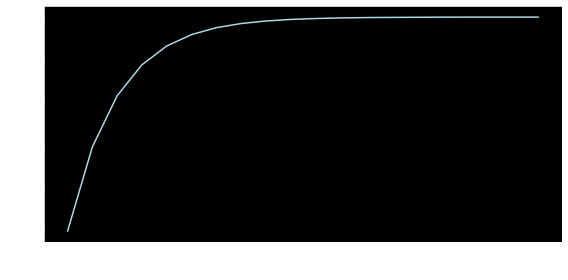

In [28]:
fig=plt.figure(figsize=(8,4))
plt.plot(sol.t,sol.y[0], color = 'lightblue')
plt.xlabel('time')
plt.ylabel('y(t)')
fig.tight_layout()
# plt.savefig('./img/imgivp.png', transparent = True)
# './img/imgivp.png'
# plt.close()

Il existe une autre bibliothèque dans <code>scipy</code> nommée <code>odeint</code>. Ce module est plus ancien, en particulier dans son interface. On peut le trouver aussi sur internet comme une solution pour résoudre une équation différentielle.

## Résolution en utilisant Gekko
![GEKKO Optimization Suite](http://apmonitor.com/wiki/uploads/Main/gekko_optimization.png)

<code>Gekko</code> est une autre bibliothèque, que j'ai trouvé sur le site d'une université Américaine. Cette librairie résout plusieurs problèmes numériques. Voici ici son application à la résolution de l'équation différentielle.

Text(0, 0.5, 'y')

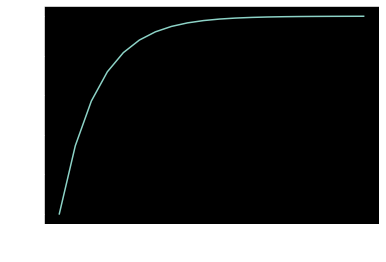

In [17]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

m = GEKKO(remote = False)      # création d'un modèle local
m.time = np.linspace(0,10,20)  # l'axe des temps du modèle
y = m.Var(value=0.0)           # la valeur au démarrage
t = m.Param(value=m.time)      # le paramètre temps du modèle
m.Equation(y.dt()==1 - y)      # l'équation différentielle
m.options.IMODE = 4
m.solve(disp=False)            # resolution sans montrer le détail

plt.plot(m.time,y.value)       # affichage avec matplotlib.
plt.xlabel('time')
plt.ylabel('y')

Au final, il y a beaucoup de solution pour résoudre numériquement une équation différentielle, car c'est un cas très courant pour les sciences de l'ingénieur. Il existe peut être encore d'autre solveur ou des recettes pour faire son propre solveur. Mais attention avant de s'embarquer dans l'aventure. L'analyse numérique contient beaucoup de recette et de méthode et il est bon de les apprendre pour ne pas ré-inventer l'eau chaude !